<a href="https://colab.research.google.com/github/ancestor9/ADSP-Crash-Course/blob/main/odds_ratio_logit_sigmoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. 확률(Probability)과 오즈비(odds ratio)**
## **1.1. 확률(Probability)**: 이벤트가 발생할 확률을 𝑃 라고 표현

\begin{equation}
P(A) : A가 일어날 확률
\end{equation}
## **1.2. 오즈(odds)**: 다른 사건의 확률에 대한 비율
\begin{equation}
\text{Odds of }(A) = \left(\frac{P(A)}{1 - P(A)}\right)
\end{equation}




<img src='https://assets.cureus.com/uploads/figure/file/138481/article_river_65ee62a0db3611eaafa31b2789baa093-fig-1-odds-vs-prob.png' width=600>




# **2. 로짓 함수**
## A사건의 오즈(odds)에 자연 로그를 취한 것

<img src="https://velog.velcdn.com/images/zlddp723/post/3eb60dde-022f-4b47-b01e-ce45d4bfb78f/image.png">

- 분모가 분자보다 크면 0과 1사이에, 그 반대는 무한대까지 0을 중심으로 간격이 다르게 되어 등간척도를 갖기위해 로그를 취한 것을 logit

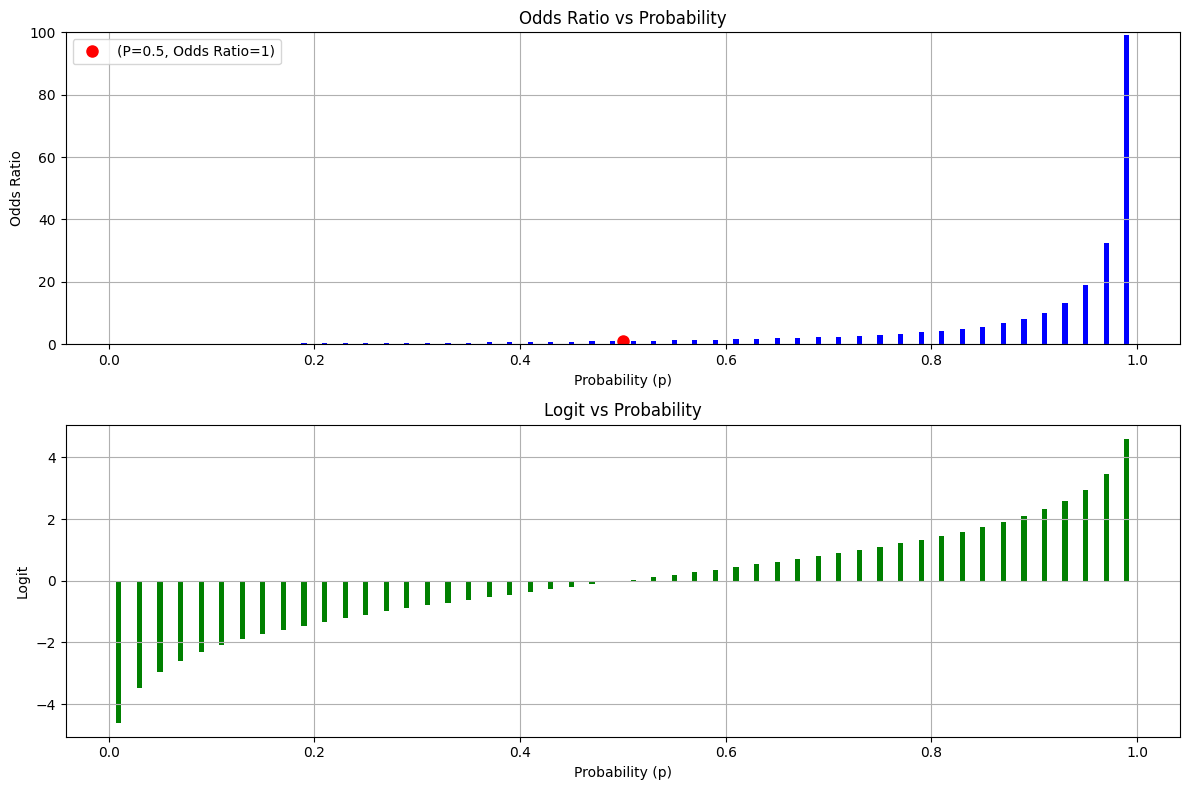

In [1]:
# prompt: 확률이 0과 1사이 100개 구간으로 존재할 경우 odd ration와 logit, softmax 값을 데이터프레임으로 만들어라, 컬럼명을 잘서달라
import pandas as pd
import numpy as np
# 확률 0과 1사이 100개 구간 생성
probabilities = np.linspace(0.01, 0.99, 50)
# 오즈비 계산
odds_ratio = probabilities / (1 - probabilities)
# logit 계산
logit = np.log(odds_ratio)

# 데이터프레임 생성
df = pd.DataFrame({
    'Probability': probabilities,
    'Odds Ratio': odds_ratio,
    'Logit': logit,
})
df.columns = ['Probability', 'Odds Ratio', 'Logit']
import matplotlib.pyplot as plt

# 시각화
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# 오즈비 플롯 (막대 그래프)
ax[0].bar(probabilities, odds_ratio, width=0.005, color='blue') # 'p'를 'probabilities'로, 'odds'를 'odds_ratio'로 수정
ax[0].set_xlabel('Probability (p)')
ax[0].set_ylabel('Odds Ratio')
ax[0].set_title('Odds Ratio vs Probability')
ax[0].set_ylim(0, 100) # y축 범위 조정
ax[0].grid(True)

# P=0.5일 때 Odds Ratio=1 표시
ax[0].plot(0.5, 1, 'o', color='red', markersize=8, label='(P=0.5, Odds Ratio=1)')
ax[0].legend()

# 로짓 플롯 (막대 그래프)
ax[1].bar(probabilities, logit, width=0.005, color='green') # 'p'를 'probabilities'로, 'logit'은 이미 정의됨
ax[1].set_xlabel('Probability (p)')
ax[1].set_ylabel('Logit')
ax[1].set_title('Logit vs Probability')
ax[1].grid(True)

plt.tight_layout()
plt.show()


# **3. Logistic Regression Equation**

- **확률**: 이벤트가 발생할 확률을 𝑃 라고 표현할 수 있습니다.
- **로짓 함수**:로짓 함수는 확률 𝑃 오즈(odds)에 자연 로그를 취한 것입니다.

\begin{equation}
P(A)
\end{equation}

\begin{equation}
\text{Logit}(A) = \log\left(\frac{P(A)}{1 - P(A)}\right)
\end{equation}


<img src='https://lh4.googleusercontent.com/proxy/MeplmTXKAnUuUzgYMEJd_Tg3AIR_NV12Yd3SzleSGZaChDbbicGwVq3ZuESWr4c1Rd2w1BsHWTMjEUDPdpm8EdVwzQjxTBqcKRzqKx06jg'>

- **로지스틱 회귀 방정식**: 로지스틱 회귀 모델은 독립 변수 𝑋의 함수로 종속 변수의 확률 𝑃 를 예측







\begin{equation}
P = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n)}}
\end{equation}

- **로짓 변환(Logit Transformation)**:확률 𝑃에 로짓을 취하면, 종속 변수와 독립 변수 사이의 관계를 선형변환
\begin{equation}
\log\left(\frac{P}{1 - P}\right) = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \ldots + \beta_n X_n
\end{equation}


## <font color='red'>**계수 (𝛽) 의미(기출시험 출제빈도 높음)**
### 양의 계수 : 해당 독립 변수가 증가할수록 종속 변수의 로그 오즈가 증가하여, 발생 확률이 높아짐을 의미
### 음의 계수 : 해당 독립 변수가 증가할수록 종속 변수의 로그 오즈가 감소하여, 생 확률이 낮아짐을 의미

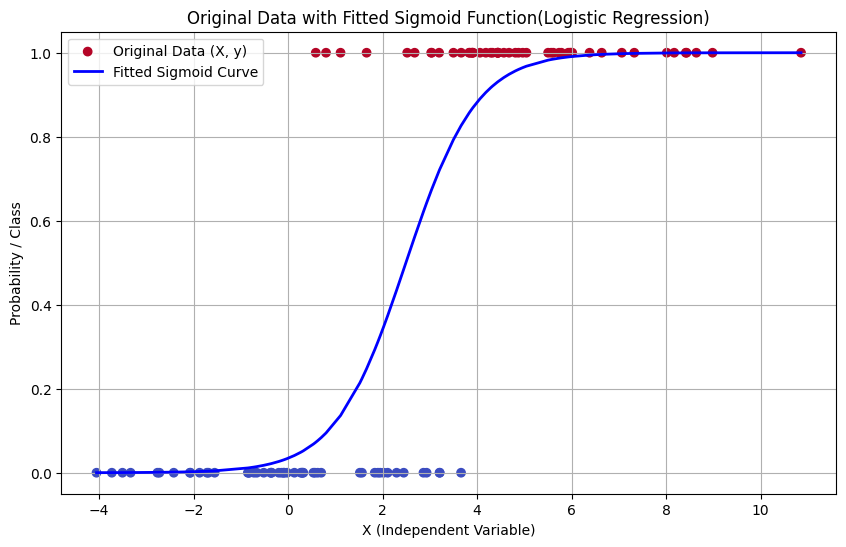

In [3]:
import statsmodels.api as sm

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 1, centers=2, random_state=14, cluster_std=2)
X_const = sm.add_constant(X)
logit_model = sm.Logit(y, X_const)
logit_result = logit_model.fit(disp=0) # disp=0 suppresses convergence messages

# Get predicted probabilities (sigmoid output)
y_predict_sigmoid = logit_result.predict(X_const)

# Sort X values for smooth plotting of the sigmoid curve
sort_idx = np.argsort(X.flatten())
X_sorted = X[sort_idx]
y_predict_sigmoid_sorted = y_predict_sigmoid[sort_idx]

# Plot the original data and the fitted sigmoid curve
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c=y, cmap='coolwarm', label='Original Data (X, y)')
plt.plot(X_sorted, y_predict_sigmoid_sorted, color='blue', linewidth=2, label='Fitted Sigmoid Curve')

plt.xlabel('X (Independent Variable)')
plt.ylabel('Probability / Class')
plt.title('Original Data with Fitted Sigmoid Function (Logistic Regression)')
plt.grid(True)
plt.legend()
plt.show()